In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
rent_df = pd.read_csv("House_Rent_Dataset.csv")



In [30]:
# Afficher un échantillon des données
print(rent_df.sample(5))

       Posted On  BHK   Rent  Size            Floor    Area Type  \
2002  2022-06-20    2  12500   800       2 out of 3   Super Area   
434   2022-06-03    2   8500   780  Ground out of 2  Carpet Area   
626   2022-06-04    3  85000   850     25 out of 35  Carpet Area   
2648  2022-05-05    2  10000    55       2 out of 4   Super Area   
2343  2022-06-12    3  55000  1788  Ground out of 1  Carpet Area   

                    Area Locality       City Furnishing Status  \
2002               Nagondanahalli  Bangalore         Furnished   
434                  Airport Area    Kolkata       Unfurnished   
626   Oberoi Woods, Goregaon East     Mumbai    Semi-Furnished   
2648              Dwarka Sector 8      Delhi       Unfurnished   
2343          Koramangala Block 4  Bangalore    Semi-Furnished   

      Tenant Preferred  Bathroom Point of Contact  
2002  Bachelors/Family         2    Contact Owner  
434          Bachelors         1    Contact Owner  
626             Family         3    Co

In [31]:
# Afficher la forme des données
print(rent_df.shape)



(4746, 12)


In [32]:
# Afficher les colonnes
print(rent_df.columns)



Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')


In [33]:
# Informations sur les données
print(rent_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [34]:
# Vérifier les doublons
print(rent_df.duplicated().sum())



0


In [35]:
# Afficher les 5 premières valeurs de la colonne "Rent"
print(rent_df["Rent"].sort_values()[:5])

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64


In [38]:
# Supprimer les doublons
rent_df = rent_df.drop_duplicates()
# Gérer les valeurs manquantes
rent_df = rent_df.dropna()

# Convertir les types de données si nécessaire
rent_df["Rent"] = rent_df["Rent"].astype(float)
rent_df["Size"] = rent_df["Size"].astype(float)

# Encoder les variables catégorielles
rent_df = pd.get_dummies(rent_df, columns=["City", "Furnishing Status", "Tenant Preferred", "Area Type", "Area Locality"], drop_first=True)

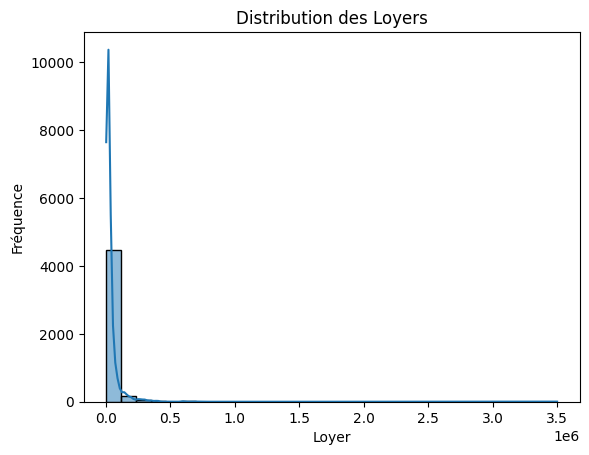

In [39]:
# Distribution des loyers
sns.histplot(rent_df["Rent"], bins=30, kde=True)
plt.title("Distribution des Loyers")
plt.xlabel("Loyer")
plt.ylabel("Fréquence")
plt.show()


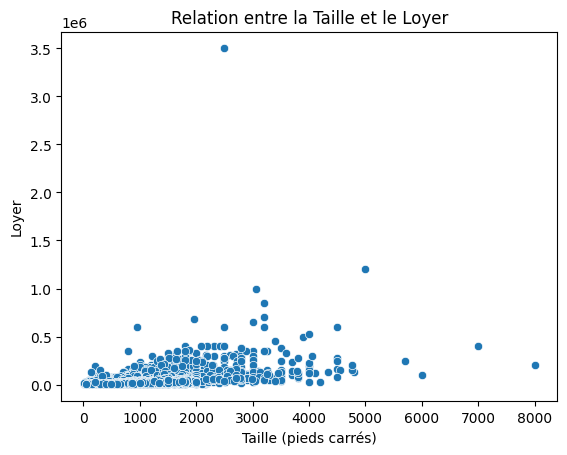

In [40]:
# Relation entre la taille et le loyer
sns.scatterplot(x="Size", y="Rent", data=rent_df)
plt.title("Relation entre la Taille et le Loyer")
plt.xlabel("Taille (pieds carrés)")
plt.ylabel("Loyer")
plt.show()

In [41]:
# Sélectionner les caractéristiques et la cible
X = rent_df.drop(columns=["Rent", "Posted On", "Point of Contact"])
y = rent_df["Rent"]


In [42]:
print(X.head())  # Affiche les premières lignes de X

   BHK    Size            Floor  Bathroom  City_Chennai  City_Delhi  \
0    2  1100.0  Ground out of 2         2         False       False   
1    2   800.0       1 out of 3         1         False       False   
2    2  1000.0       1 out of 3         1         False       False   
3    2   800.0       1 out of 2         1         False       False   
4    2   850.0       1 out of 2         1         False       False   

   City_Hyderabad  City_Kolkata  City_Mumbai  \
0           False          True        False   
1           False          True        False   
2           False          True        False   
3           False          True        False   
4           False          True        False   

   Furnishing Status_Semi-Furnished  ...  Area Locality_sra  \
0                             False  ...              False   
1                              True  ...              False   
2                              True  ...              False   
3                             Fa

In [43]:
print(y.head())  # Affiche les premières lignes de y

0    10000.0
1    20000.0
2    17000.0
3    10000.0
4     7500.0
Name: Rent, dtype: float64


In [16]:
import numpy as np

def process_floor(floor):
    if "out of" in floor:
        parts = floor.split(" out of ")
        try:
            floor_number = float(parts[0]) if parts[0] != "Ground" else 0
            total_floors = float(parts[1])
        except ValueError:
            floor_number = np.nan
            total_floors = np.nan
        return floor_number, total_floors
    return np.nan, np.nan

# Appliquer la fonction à la colonne Floor
rent_df[['FloorNumber', 'TotalFloors']] = rent_df['Floor'].apply(lambda x: pd.Series(process_floor(x)))

# Supprimer la colonne originale Floor si elle n'est plus nécessaire
rent_df= rent_df.drop(columns=['Floor'])

In [18]:
print(rent_df[['FloorNumber', 'TotalFloors']].head())


   FloorNumber  TotalFloors
0          0.0          2.0
1          1.0          3.0
2          1.0          3.0
3          1.0          2.0
4          1.0          2.0


In [21]:
rent_df['FloorNumber'].fillna(0, inplace=True)
rent_df['TotalFloors'].fillna(rent_df['TotalFloors'].mean(), inplace=True)


C:\Users\yssin\AppData\Local\Temp\ipykernel_7576\4184654799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rent_df['FloorNumber'].fillna(0, inplace=True)
C:\Users\yssin\AppData\Local\Temp\ipykernel_7576\4184654799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [22]:
rent_df.dropna(subset=['FloorNumber', 'TotalFloors'], inplace=True)


In [24]:
X = rent_df[['BHK', 'Size', 'Bathroom', 'FloorNumber', 'TotalFloors', 'City_Chennai', 'City_Delhi']]  # Ajouter les colonnes nécessaires
y = rent_df['Rent']

# Diviser les données et entraîner le modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 2254306780.0506444
R² Score: 0.4343560626591152


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner un modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Faire des prédictions
y_pred = rf_model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 2227245922.987398
R² Score: 0.44114609224715984


In [27]:
rent_df['FloorNumber'] = rent_df['Floor'].str.split(' ').str[0].replace('Ground', 0).astype(int)
rent_df['TotalFloors'] = rent_df['Floor'].str.split(' ').str[-1].astype(int)

KeyError: 'Floor'